# Fraud Detection Project
### Ali Ebrahimi

## Part 1 : Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DF_Fraud = pd.read_csv('C:/Users/Ali/Desktop/UOttawa/Job/Interview/BrainFinance/data_scientist_exercise-master/fraud_prep.csv', sep= ',')

X = DF_Fraud.iloc[:, 0:-1]
X = np.array(X).astype(np.float)
y = DF_Fraud.iloc[:, -1]
y=np.array(y).astype(np.float)

class_names = {0:'Not Fraud', 1:'Fraud'}
print(DF_Fraud.Class.value_counts().rename(index = class_names))

DF_Fraud.describe()

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Part 2 : Visualizing Dataset

### Distributions

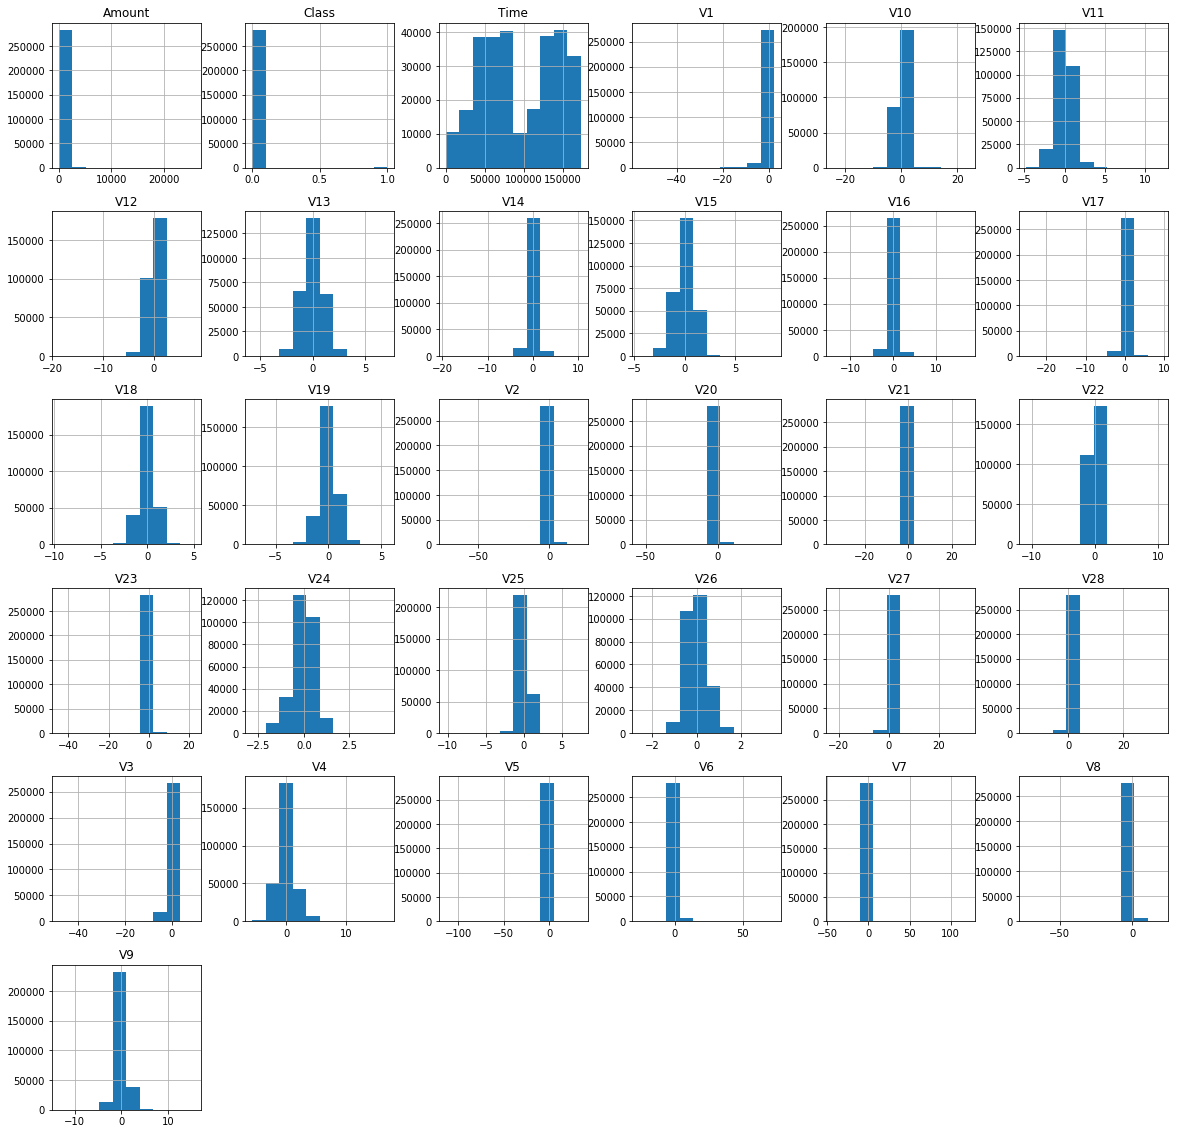

In [2]:
DF_Fraud.hist(figsize=(20,20))
plt.show()

### Class

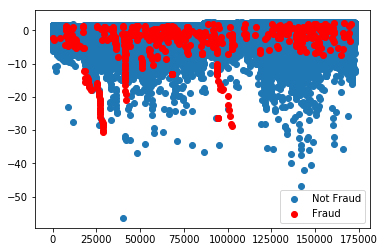

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Not Fraud")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", c='r')
plt.legend()
plt.show()

## Part 3 : Standardization Time & Amount, Resampleing (Synthetic Minority Over-sampling Technique (SMOTE)) & Visualizing Distributions

In [4]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer

#data_norm = DF_Fraud.copy() 
DF_Fraud[['Time','Amount']] = StandardScaler().fit_transform(DF_Fraud[['Time','Amount']])
DF_Fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.050379e-14,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


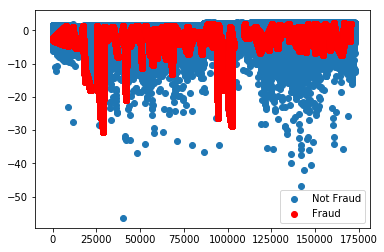

1.0    284315
0.0    284315
dtype: int64
0.0    284315
1.0       492
dtype: int64


In [5]:
from imblearn.over_sampling import SMOTE

Resmpl = SMOTE(kind='regular')
X_Resmpl, y_Resmpl = Resmpl.fit_sample(X,y)
plt.scatter(X_Resmpl[y_Resmpl == 0, 0], X_Resmpl[y_Resmpl == 0, 1], label="Not Fraud")
plt.scatter(X_Resmpl[y_Resmpl == 1, 0], X_Resmpl[y_Resmpl == 1, 1], label="Fraud",c='r')
plt.legend()
plt.show()
print(pd.value_counts(pd.Series(y_Resmpl)))
print(pd.value_counts(pd.Series(y)))

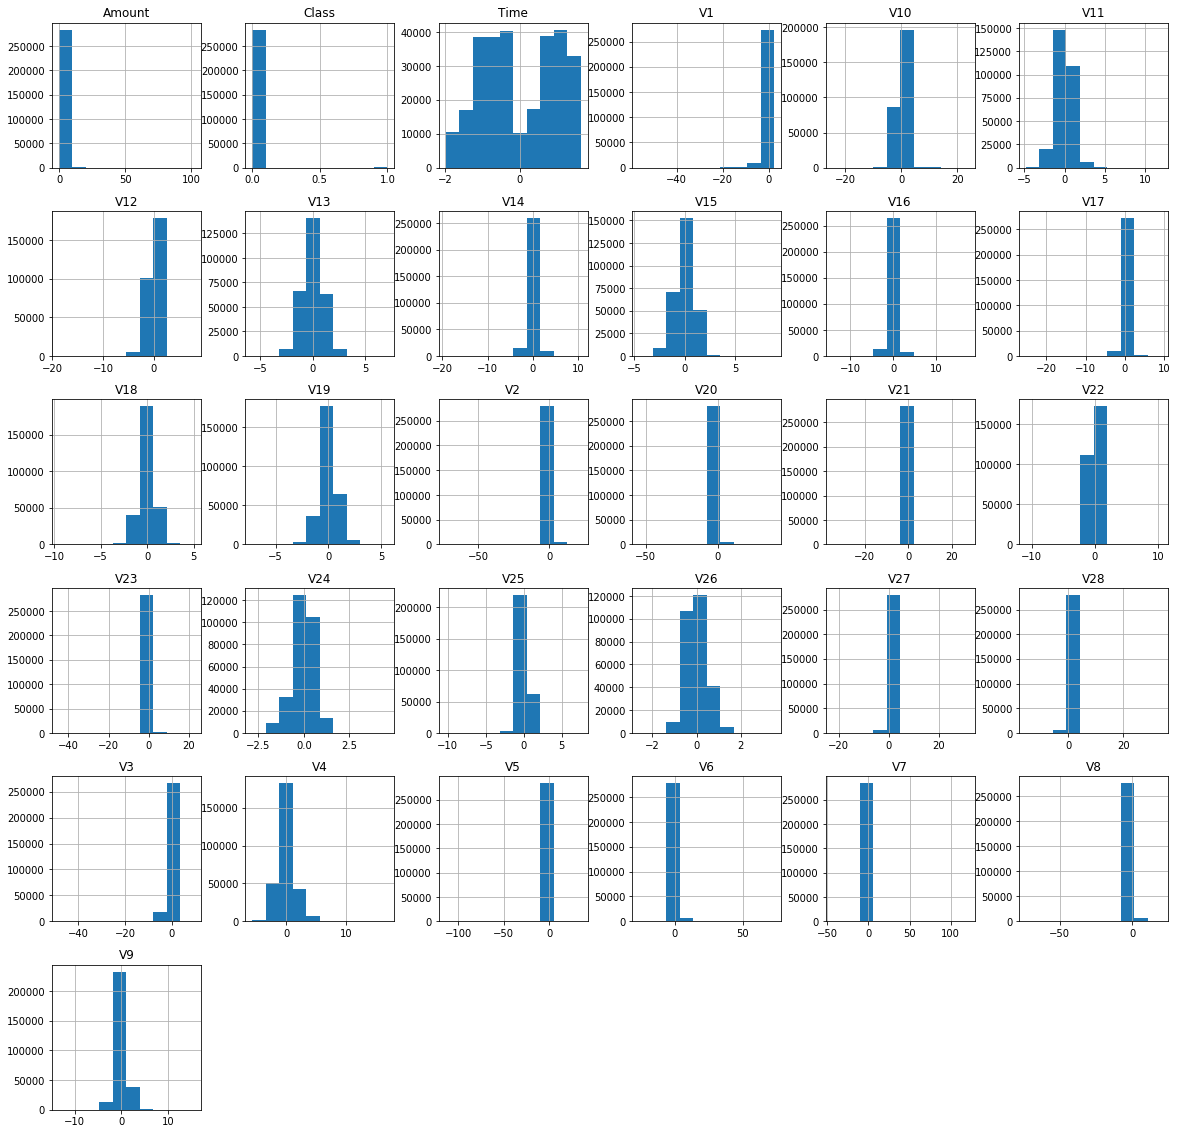

In [6]:
DF_Fraud.hist(figsize=(20,20))
plt.show()

Text(0.5,1,'Heatmap of Correlation')

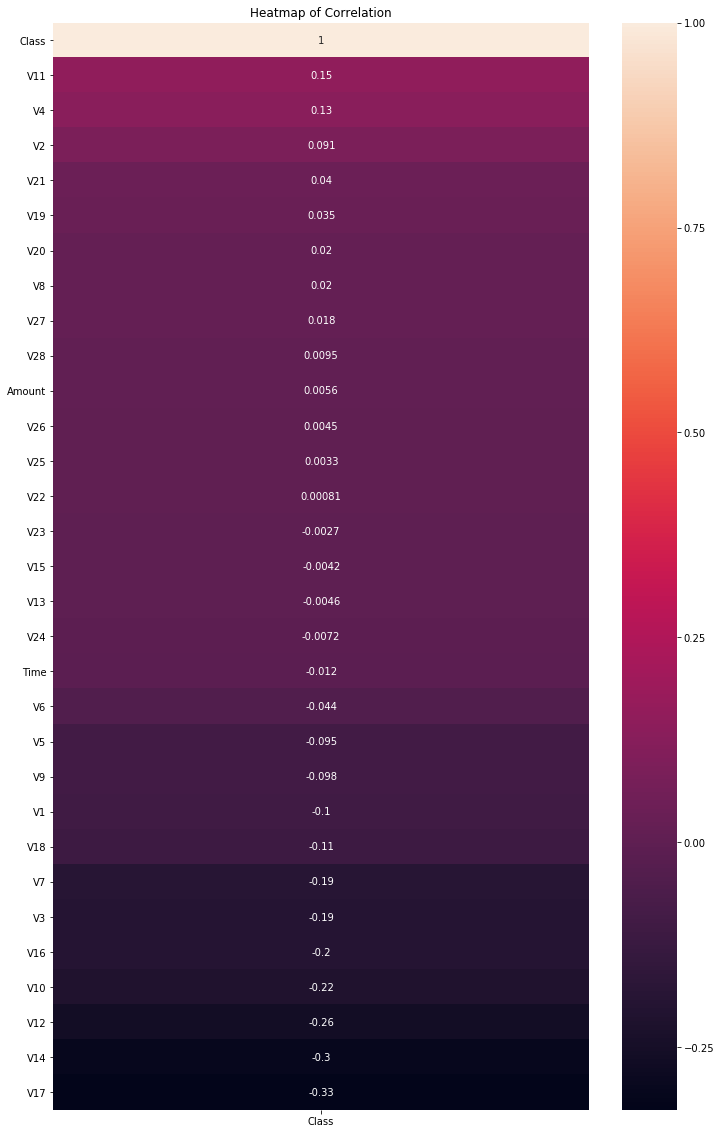

In [7]:
corr = DF_Fraud.corr().sort_values('Class', ascending=False)
correlation = corr[['Class']]
plt.figure(figsize=(12,20))
sns.heatmap(data=correlation,annot=True)
plt.title('Heatmap of Correlation')

## Part 4: Dimetion Reduction

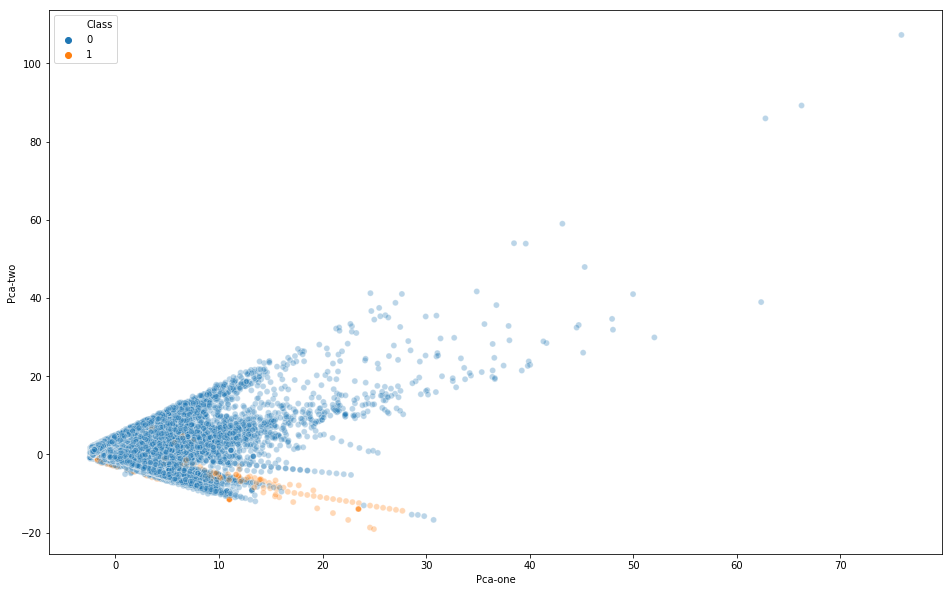

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(DF_Fraud)
DF_Fraud['Pca-one'] = pca_result[:,0]
DF_Fraud['Pca-two'] = pca_result[:,1] 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="Pca-one", y="Pca-two",
    hue="Class",
    data=DF_Fraud,
    legend="full",
    alpha=0.3)
plt.show()

## Part 5: Spilitting Test & Train

In [9]:
X = DF_Fraud.iloc[:, 0:-3]
y = DF_Fraud.iloc[:, -3]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y ,train_size=0.70, test_size=0.30, random_state=0)

## Part 6: Machine Learning Methods

### A - Supervised Learning

#### 6-1: KFold & Resampleing (Synthetic Minority Over-sampling Technique (SMOTE))

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

Spilit = 10

kfold = KFold(n_splits=Spilit, random_state=123, shuffle = True)

Resmpl = SMOTE(kind='regular')
X_Resmpl, y_Resmpl = Resmpl.fit_sample(X_train,y_train)
results=[]
names=[]

#### 6-2: Logistic Regression

##### Cross Validation

In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR_CV = cross_val_score(LR, X_Resmpl, y_Resmpl, cv=kfold, scoring='roc_auc')
results.append(LR_CV)
names.append('Logistic Regression')
LR_CV.mean()

0.9906604275684826

##### Confusion Matrix

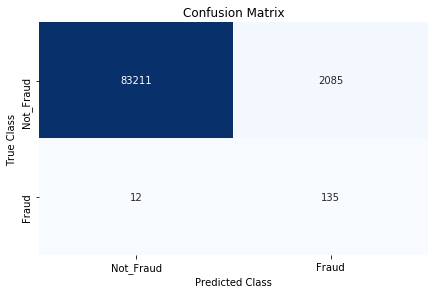

             precision    recall  f1-score   support

  Not_Fraud       1.00      0.98      0.99     85296
      Fraud       0.06      0.92      0.11       147

avg / total       1.00      0.98      0.99     85443

Accuracy: 0.975
Sensitivity (Recall): 0.918
Specificity: 0.976
Precision: 0.061


In [12]:
LR.fit(X_Resmpl, y_Resmpl)
LR_Predict = LR.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, LR_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, LR_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

#### 6-3: KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN_CV = cross_val_score(KNN, X_Resmpl, y_Resmpl, cv=kfold, scoring='roc_auc')
results.append(KNN_CV)
names.append('KNN')
KNN_CV.mean()

0.9997213670502477

##### Confusion Matrix

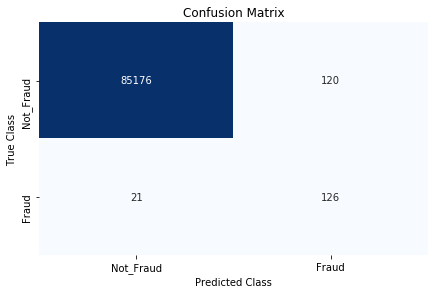

             precision    recall  f1-score   support

  Not_Fraud       1.00      1.00      1.00     85296
      Fraud       0.51      0.86      0.64       147

avg / total       1.00      1.00      1.00     85443

Accuracy: 0.998
Sensitivity (Recall): 0.857
Specificity: 0.999
Precision: 0.512


In [14]:
KNN.fit(X_Resmpl, y_Resmpl)
KNN_Predict = KNN.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, KNN_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, KNN_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

#### 6-4: Decision Tree

##### Cross Validation

In [15]:
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier()
CART_CV = cross_val_score(CART, X_Resmpl, y_Resmpl, cv=kfold, scoring='roc_auc')
results.append(CART_CV)
names.append('Decision Tree')
CART_CV.mean()

0.9983017415365006

##### Confusion Matrix


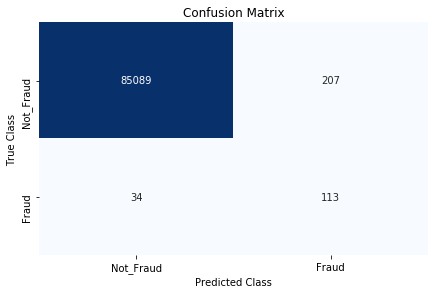

             precision    recall  f1-score   support

  Not_Fraud       1.00      1.00      1.00     85296
      Fraud       0.35      0.77      0.48       147

avg / total       1.00      1.00      1.00     85443

Accuracy: 0.997
Sensitivity (Recall): 0.769
Specificity: 0.998
Precision: 0.353


In [16]:
CART.fit(X_Resmpl, y_Resmpl)
CART_Predict = CART.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, CART_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, CART_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

#### 6-5: SVC

##### Cross Validation

In [17]:
from sklearn.svm import SVC
SVM = SVC()

kfold_SVM = KFold(n_splits=3, random_state=123, shuffle = True)

SVM_CV = cross_val_score(SVM, X_Resmpl, y_Resmpl, cv=kfold_SVM, scoring='roc_auc')
results.append(SVM_CV)
names.append('SVC')
SVM_CV.mean()

0.9999147510537999

##### Confusion Matrix


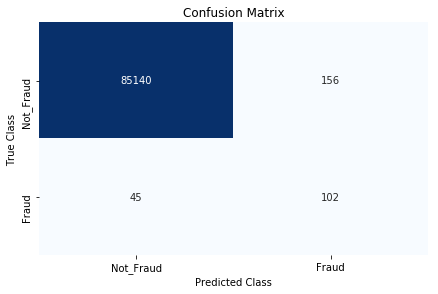

             precision    recall  f1-score   support

  Not_Fraud       1.00      1.00      1.00     85296
      Fraud       0.40      0.69      0.50       147

avg / total       1.00      1.00      1.00     85443

Accuracy: 0.998
Sensitivity (Recall): 0.694
Specificity: 0.998
Precision: 0.395


In [19]:
SVM.fit(X_Resmpl, y_Resmpl)
SVM_Predict = SVM.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, SVM_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, SVM_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

#### 6-6: Random Forest

##### Cross Validation

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF_CV = cross_val_score(RF, X_Resmpl, y_Resmpl, cv=kfold, scoring='roc_auc')
results.append(RF_CV)
names.append('Random Forest')
RF_CV.mean()

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9999844832911601

##### Confusion Matrix

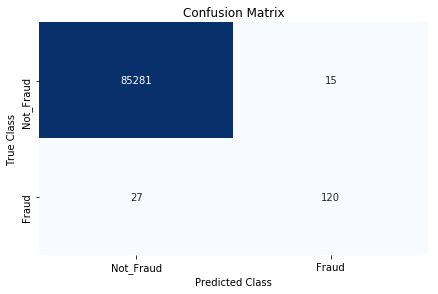

             precision    recall  f1-score   support

  Not_Fraud       1.00      1.00      1.00     85296
      Fraud       0.89      0.82      0.85       147

avg / total       1.00      1.00      1.00     85443

Accuracy: 1.000
Sensitivity (Recall): 0.816
Specificity: 1.000
Precision: 0.889


In [21]:
RF.fit(X_Resmpl, y_Resmpl)
RF_Predict = RF.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, RF_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, RF_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

#### 6-7: Naive Bayes

##### Cross Validation

In [22]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB_CV = cross_val_score(NB, X_Resmpl, y_Resmpl, cv=kfold, scoring='roc_auc')
results.append(NB_CV)
names.append('Naive Bayes')
NB_CV.mean()

0.9520437291389954

##### Confusion Matrix

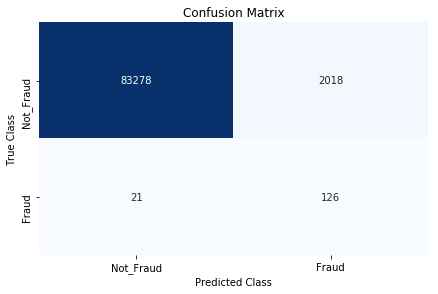

             precision    recall  f1-score   support

  Not_Fraud       1.00      0.98      0.99     85296
      Fraud       0.06      0.86      0.11       147

avg / total       1.00      0.98      0.99     85443

Accuracy: 0.976
Sensitivity (Recall): 0.857
Specificity: 0.976
Precision: 0.059


In [23]:
NB.fit(X_Resmpl, y_Resmpl)
NB_Predict = NB.predict(X_test)

class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, NB_Predict)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, NB_Predict, target_names=class_names))

TP=matrix[1,1]
TN=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
acc = (TP+TN)/(TP+FP+TN+FN)
rec = TP/(TP+FN)
spe = TN/(TN+FP)
pre = TP/(TP+FP)

print("Accuracy: %.3f" % (acc))
print("Sensitivity (Recall): %.3f" % (rec))
print("Specificity: %.3f" % (spe))
print("Precision: %.3f" % (pre))

## Algorithm Comparison

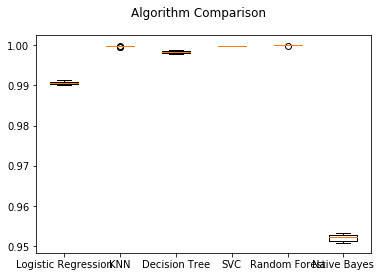

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### A - Unsupervised Learning
We can impeliment some methods like scatter matrix to figure out is our that we can solve our problem by using unsopervised methods like Kmeans.

#### 6-8: K-Means

In [25]:
from sklearn.cluster import MiniBatchKMeans 

kmeans = MiniBatchKMeans(n_clusters=10, random_state=0)
kmeans.fit(X_Resmpl)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

#### 6-6: Testing Using Elbow Method

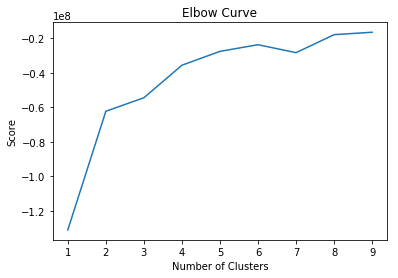

In [26]:
from sklearn.model_selection import train_test_split
clustno = range(1, 10)
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno] 
score = [kmeans[i].fit(X_Resmpl).score(X_Resmpl) for i in range(len(kmeans))]
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

In [27]:
kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)
kmeans.fit(X_Resmpl)
y_pred = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9987125920204113


In [28]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[85287,     9],
       [  101,    46]], dtype=int64)

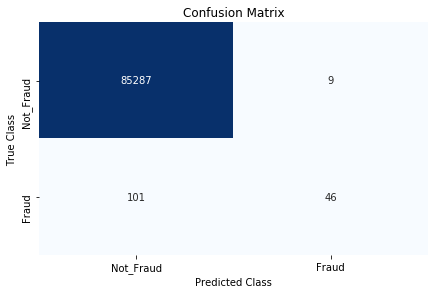

             precision    recall  f1-score   support

  Not_Fraud       1.00      1.00      1.00     85296
      Fraud       0.84      0.31      0.46       147

avg / total       1.00      1.00      1.00     85443



In [29]:
class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))